In [2]:
########## 29 May 2018 - Alec S. Hirschauer ##########
# Today I am going to make CMDs for NGC 6822 using 2MASS photometric data.
#
# Previous plots I have made using this data, matched to Kahn et al. (2015),
# show an anomalous cloud of points 'blueward' of the main sequence,
# for J/H/K vs. J/H/K - [3.6]/[4.5]/[5.8]/[8.0]/[24].
#
# Our collaborator Martha Boyer suggests that there is a mis-match between
# Spitzer and 2MASS data, and that many of the points are foreground objects.
# Because NGC 6822 is relatively distant (~0.5 Mpc), 2MASS is not deep enough
# to provide useful photometry.
#
# In this notebook, I'll use only 2MASS data to make CMDs looking at the
# 'blueward' clump of points.

In [3]:
# First thing needed is to import the relevant Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import gaussian_kde
# This last line is new, and is necessary for the number density histograms.

In [4]:
# Read in my data from a .csv file saved locally.
phot_data = pd.read_csv('CMDparameters27April2018_ahirschauer.csv')
# This is a table of values with ~30,000 rows which contains the photometric data of
# the Khan et al. (2015) catalog matched to 2MASS sources with an "OR" command,
# then downloaded from MAST CasJobs.

In [5]:
# Since the .csv file imported above only has the magnitude values,
# I'll need to set the colors used in the CMDs and CCDs.
# In this case, the colors are only using data from 2MASS.
#
phot_data['jMINUSh'] = phot_data.jmag.values - phot_data.hmag.values
phot_data['jMINUSk'] = phot_data.jmag.values - phot_data.kmag.values
phot_data['hMINUSk'] = phot_data.hmag.values - phot_data.kmag.values
#
# Since I'm only using 2MASS photometry, I think these are the only
# three colors that I can make that will be useful.

In [6]:
# In my first iteration of making CMDs, I found a few erroneous color values well in excess
# of the standard plot boundaries, which made the axes ludicrously proportioned.
# While clearly I could simply define the scale of the axes such that these
# outliers are skipped, if I wanted to do any analysis of the dataset as a whole
# it is more useful for me to trim them.
#
# These erroneous color values were all in the vicinity of +/-10,000, which come from
# the fact that 'null' values in the catalog of photometric sources had been set to "-9999"
# and therefore a small value minus -9,999 becomes roughly 10,000,
# or -9,999 minus a small value becomes roughly -10,000.
#
# Rather than set individual cuts for every afflicted column (as I had tried to do earlier),
# I am making a global cut of the whole dataframe so that no value is outside of the range
# of -500.0 to +500.0, which hopefully encompasses everything useful (including RA & Dec).
#
phot_data = phot_data[(phot_data < 500.0) & (phot_data > -500.0)]
#
# The above command trims the 'phot_data' dataframe,
# but later on when I plot and/or analyze the data,
# I'd like to specify that we're dealing with a "filtered" data set,
# so the command below does that.
#
filter_phot_data = phot_data

In [7]:
# Now that the colors are identified and the data is filtered, I will make the plots.
# In total, there are six different CMD combinations that I can make:
# J vs. J - H, H vs. J - H, J vs. J - K, K vs. J - K, H vs. H - K, K vs. H - K
#
# As a point of comparison, I will make each of the plots twice; once using points
# to represent the data, and once utilizing a number density histogram method.

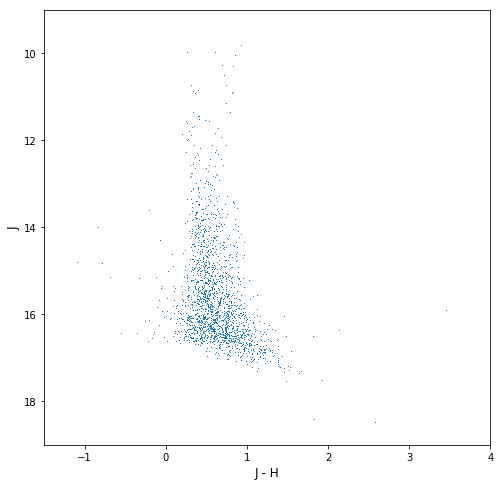

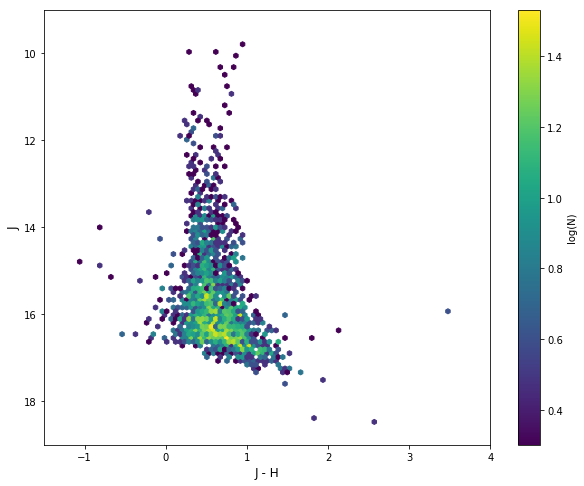

In [8]:
# J vs. J - H
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSh,filter_phot_data.jmag,',')
plt.xlim(-1.5, 4.0)
plt.ylim(19.0, 9.0)
plt.xlabel('J - H', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-H_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 4.0)
plt.ylim(19.0, 9.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSh, filter_phot_data.jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 4.0, 19.0, 9.0))
ax1.set_xlabel('J - H', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-H_hist.pdf')

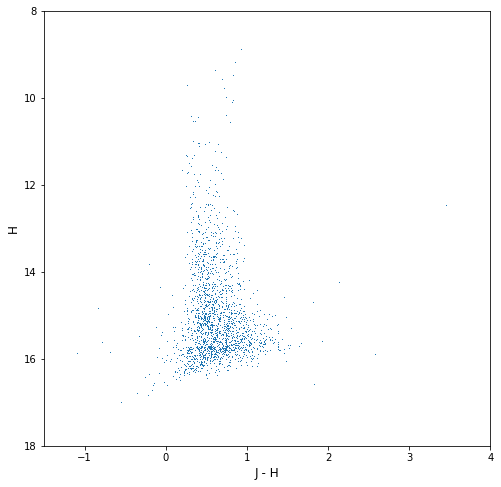

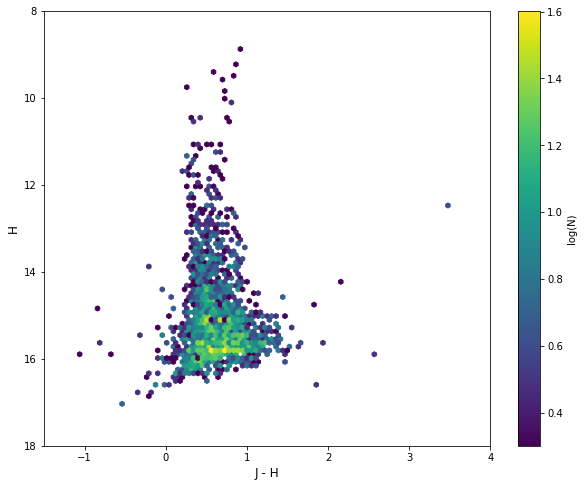

In [9]:
# H vs. J - H
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSh,filter_phot_data.hmag,',')
plt.xlim(-1.5, 4.0)
plt.ylim(18.0, 8.0)
plt.xlabel('J - H', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_J-H_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 4.0)
plt.ylim(18.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSh, filter_phot_data.hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 4.0, 18.0, 8.0))
ax1.set_xlabel('J - H', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_J-H_hist.pdf')

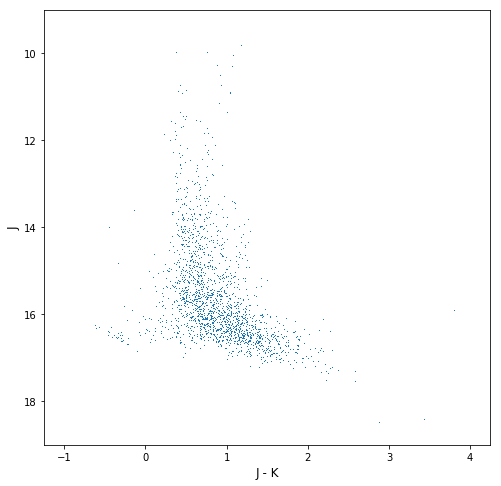

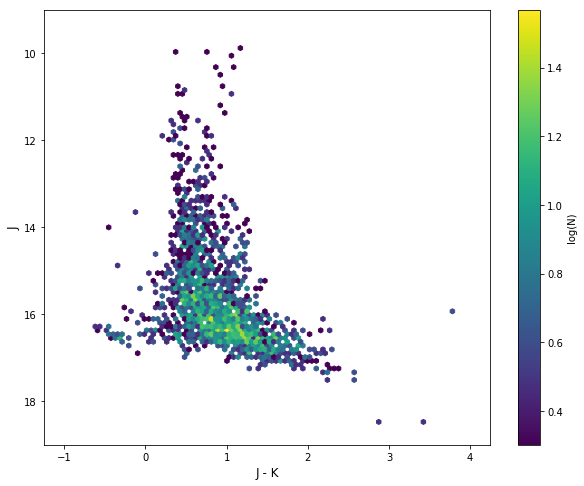

In [10]:
# J vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.jmag,',')
plt.xlim(-1.25, 4.25)
plt.ylim(19.0, 9.0)
plt.xlabel('J - K', size=12)
plt.ylabel('J', size=12)
#plt.savefig('J_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.25, 4.25)
plt.ylim(19.0, 9.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.jmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.25, 4.25, 19.0, 9.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('J', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J_vs_J-K_hist.pdf')

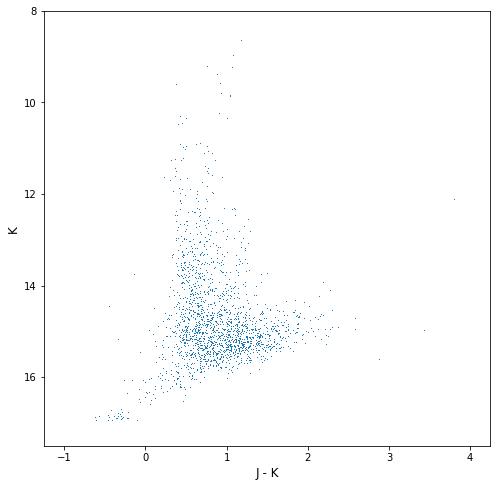

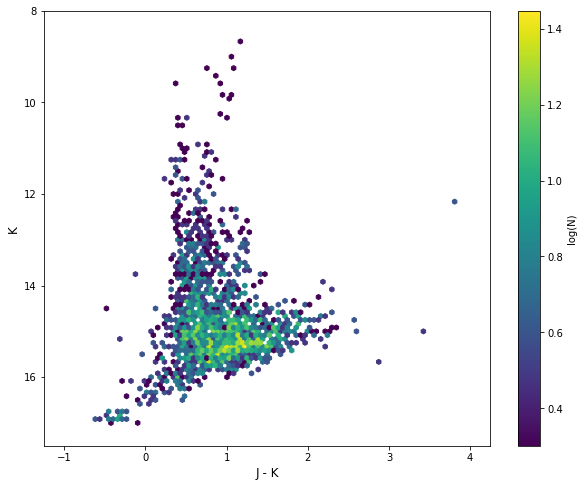

In [11]:
# K vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.kmag,',')
plt.xlim(-1.25, 4.25)
plt.ylim(17.5, 8.0)
plt.xlabel('J - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.25, 4.25)
plt.ylim(17.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.25, 4.25, 17.5, 8.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_J-K_hist.pdf')

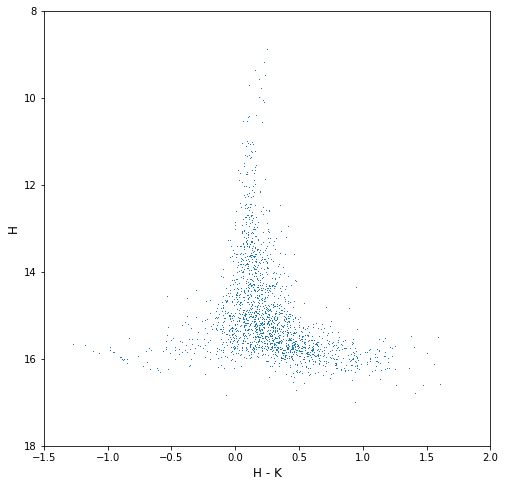

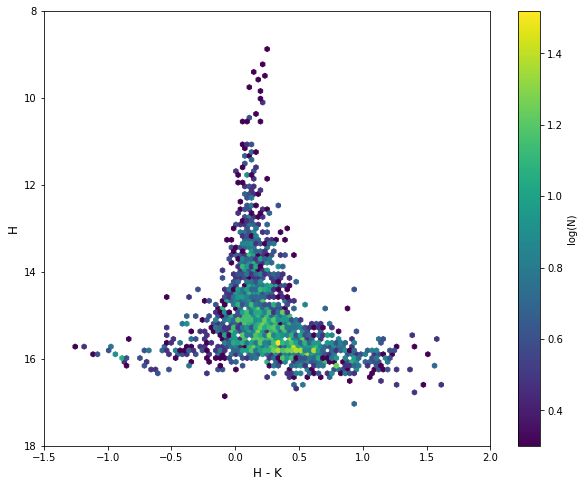

In [12]:
# H vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.hmag,',')
plt.xlim(-1.5, 2.0)
plt.ylim(18.0, 8.0)
plt.xlabel('H - K', size=12)
plt.ylabel('H', size=12)
#plt.savefig('H_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 2.0)
plt.ylim(18.0, 8.0)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.hmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 2.0, 18.0, 8.0))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H_vs_H-K_hist.pdf')

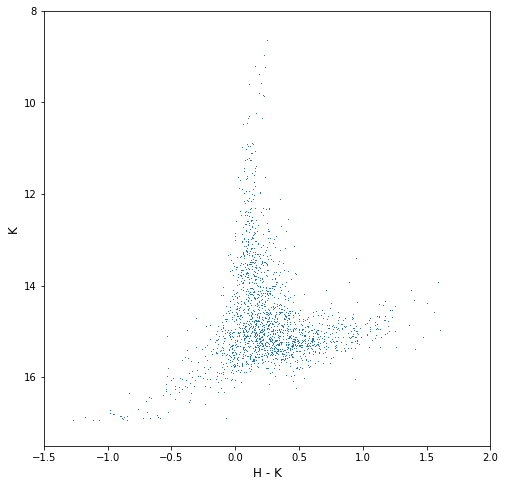

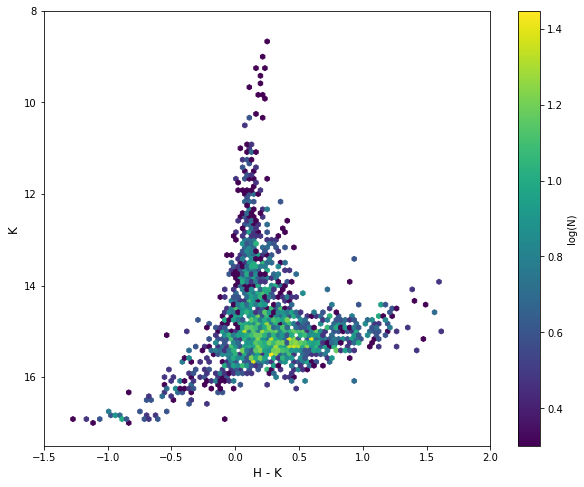

In [13]:
# K vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.kmag,',')
plt.xlim(-1.5, 2.0)
plt.ylim(17.5, 8.0)
plt.xlabel('H - K', size=12)
plt.ylabel('K', size=12)
#plt.savefig('K_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 2.0)
plt.ylim(17.5, 8.0)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.kmag, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 2.0, 17.5, 8.0))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('K_vs_H-K_hist.pdf')

In [14]:
# Well, there you go.  In the J - H and J - K plots, I am convinced
# that I see a split in the main sequence, but this is harder to see
# in the H - K plots.
#
# How about I make CCDs as well?

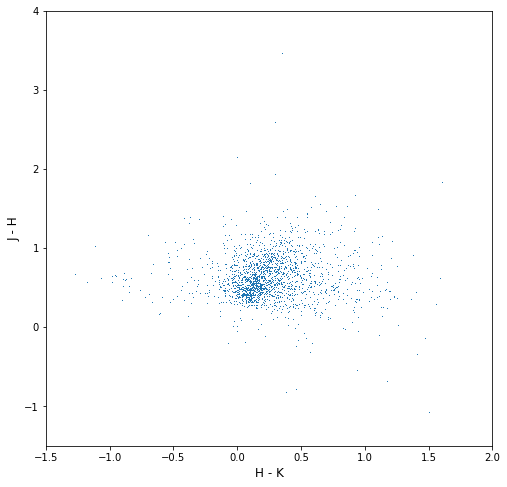

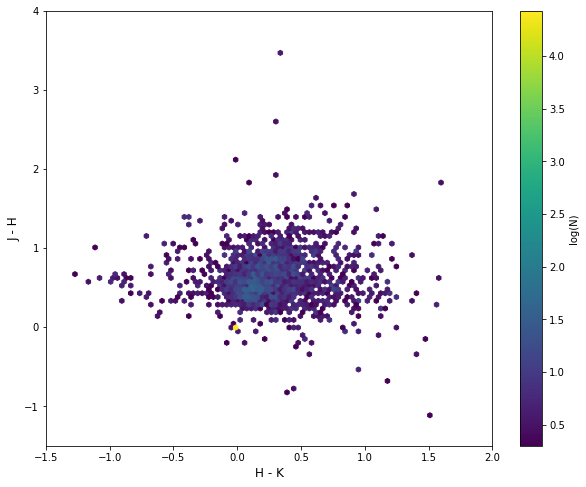

In [15]:
# J - H vs. H - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.hMINUSk,filter_phot_data.jMINUSh,',')
plt.xlim(-1.5, 2.0)
plt.ylim(-1.5, 4.0)
plt.xlabel('H - K', size=12)
plt.ylabel('J - H', size=12)
#plt.savefig('J-H_vs_H-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.5, 2.0)
plt.ylim(-1.5, 4.0)
im1 = ax1.hexbin(filter_phot_data.hMINUSk, filter_phot_data.jMINUSh, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.5, 2.0, -1.5, 4.0))
ax1.set_xlabel('H - K', size=12)
ax1.set_ylabel('J - H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J-H_vs_H-K_hist.pdf')

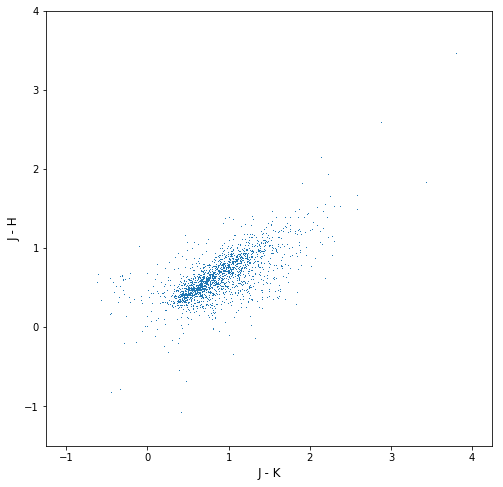

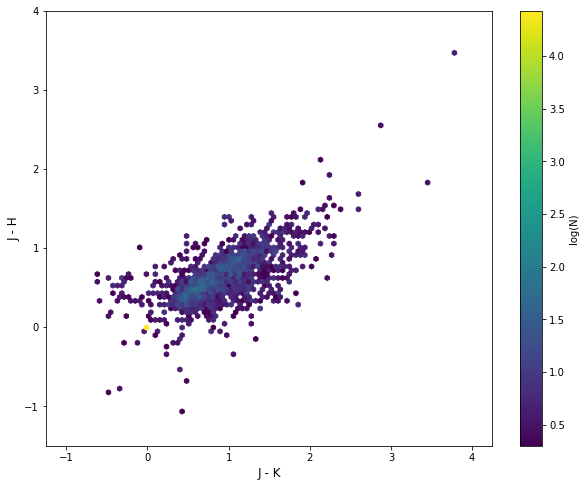

In [16]:
# J - H vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.jMINUSh,',')
plt.xlim(-1.25, 4.25)
plt.ylim(-1.5, 4.0)
plt.xlabel('J - K', size=12)
plt.ylabel('J - H', size=12)
#plt.savefig('J-H_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.25, 4.25)
plt.ylim(-1.5, 4.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.jMINUSh, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.25, 4.25, -1.5, 4.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('J - H', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('J-H_vs_J-K_hist.pdf')

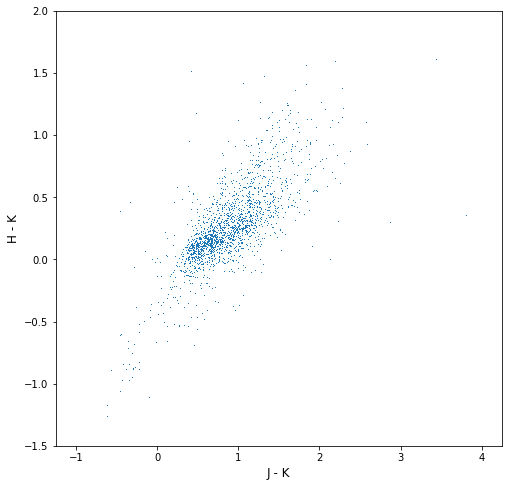

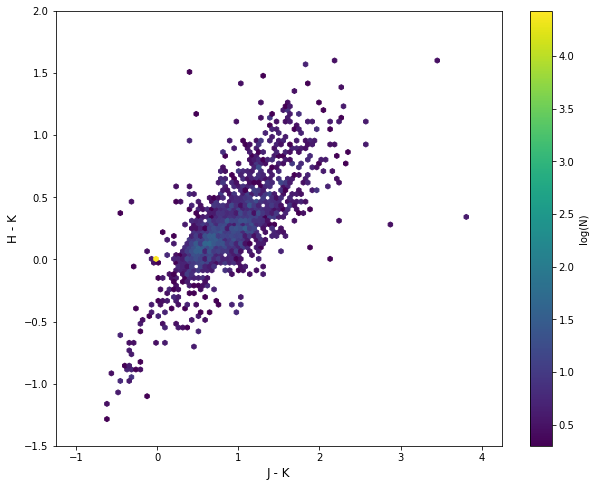

In [17]:
# H - K vs. J - K
#
plt.figure(figsize=(8,8))
plt.plot(filter_phot_data.jMINUSk,filter_phot_data.hMINUSk,',')
plt.xlim(-1.25, 4.25)
plt.ylim(-1.5, 2.0)
plt.xlabel('J - K', size=12)
plt.ylabel('H - K', size=12)
#plt.savefig('H-K_vs_J-K_plot.pdf')
#
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
plt.xlim(-1.25, 4.25)
plt.ylim(-1.5, 2.0)
im1 = ax1.hexbin(filter_phot_data.jMINUSk, filter_phot_data.hMINUSk, bins='log', cmap=plt.cm.viridis,
               mincnt=1, extent=(-1.25, 4.25, -1.5, 2.0))
ax1.set_xlabel('J - K', size=12)
ax1.set_ylabel('H - K', size=12)
cb = plt.colorbar(im1, label='log(N)')
#plt.savefig('H-K_vs_J-K_hist.pdf')

In [ ]:
# As a note to myself, here are the dimensions of best fit for the
# 2MASS magnitudes and colors for the above plots.
#
# J: 19.0, 9.0
# H: 18.0, 8.0
# K: 17.5, 8.0
# J-H: -1.5, 4.0
# J-K: -1.25, 4.25
# H-K: -1.5, 2.0